In [144]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 读取数据

In [145]:
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')

## EDA分析

In [146]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [147]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [149]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

### 查看缺失值

### 查看缺失值占比


In [150]:
def MissingHandler(df):
    Missing_Ratio = df.isnull().sum()*100/len(df)
    Missing_Num = df.isnull().sum()
    DataMissingByColumn = pd.DataFrame({'miss_nums':Missing_Num,'miss_ratio':Missing_Ratio,})
    DataMissingByColumn.sort_values(by='miss_ratio',ascending=False,inplace=True)
    return DataMissingByColumn[DataMissingByColumn['miss_ratio']>0]

In [151]:
# 查看训练集数据缺失占比
MissingHandler(train_df)

,miss_nums,miss_ratio
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000


In [152]:
# 查看测试集数据缺失占比
MissingHandler(test_df.drop(['SeriousDlqin2yrs'],axis=1))

,miss_nums,miss_ratio
MonthlyIncome,20103,19.805326
NumberOfDependents,2626,2.587116


### 查看异常值

In [153]:
train_df.describe([0.80,0.85,0.90,0.95])

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
80%,120000.200000,0.000000,0.698857,65.000000,0.000000,4.000000,9.083000e+03,12.000000,0.000000,2.000000,0.000000,2.000000
85%,127500.150000,0.000000,0.854021,68.000000,1.000000,269.150000,1.010000e+04,13.000000,0.000000,2.000000,0.000000,2.000000
90%,135000.100000,0.000000,0.981278,72.000000,1.000000,1267.000000,1.166600e+04,15.000000,0.000000,2.000000,0.000000,2.000000
95%,142500.050000,1.000000,1.000000,78.000000,2.000000,2449.000000,1.458760e+04,18.000000,1.000000,3.000000,1.000000,3.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


根据上面的统计分析来看：
- 1：RevolvingUtilizationOfUnsecuredLines字段中，95%分位数为1，但最大值为50708,很可能存在异常值
- 2：年龄的最小值为0，是一个异常值
- 3：NumberOfTime30-59DaysPastDueNotWorse 、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse这三个字段的最大值为98，但三个字段的95%分位数明显低于1，猜测可能是一个异常值，且是在30-59天、60-89天内只是逾期没有坏账，但超过了90天发生了坏账
- 4:MonthlyIncome 字段也是在95%分位的时候相对不高，但是最大值明显高于95%分位值
- 5:同样DebtRatio字段也是如上所述


In [154]:
# 有年龄为0的记录，查看年龄小于18的行数
len(train_df[train_df['age']<18])

1

In [155]:
test_df.describe([0.80,0.85,0.90,0.95])

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
80%,81202.600000,NaN,0.706875,65.000000,0.000000,3.278109,9.001000e+03,12.000000,0.000000,2.000000,0.000000,2.000000
85%,86277.700000,NaN,0.855977,68.000000,1.000000,257.000000,1.000000e+04,13.000000,0.000000,2.000000,0.000000,2.000000
90%,91352.800000,NaN,0.983342,72.000000,1.000000,1238.800000,1.150000e+04,15.000000,0.000000,2.000000,0.000000,2.000000
95%,96427.900000,NaN,1.000000,78.000000,2.000000,2435.000000,1.456810e+04,18.000000,1.000000,3.000000,1.000000,3.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


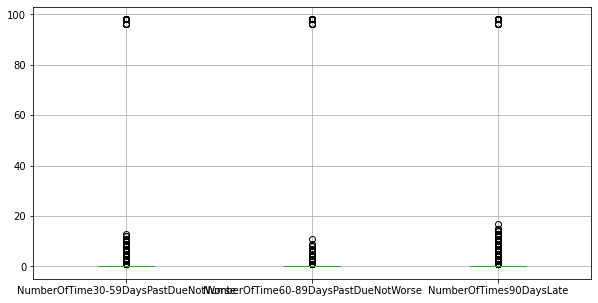

In [156]:
# 查看逾期天数
plt.figure(figsize=(10, 5)) 
train_df[['NumberOfTime30-59DaysPastDueNotWorse', 
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']].boxplot()
plt.show()

### 单变量分析

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

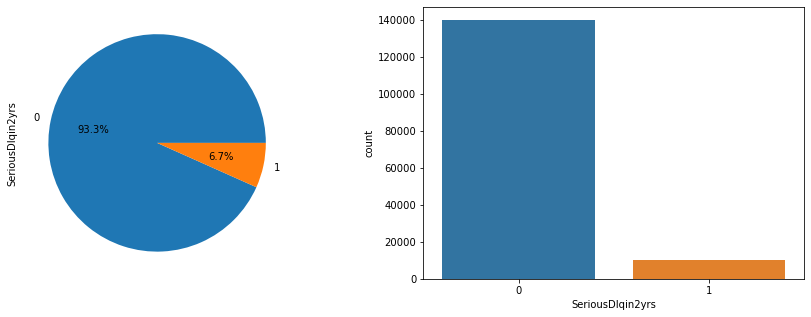

In [157]:
# 查看标签SeriousDlqin2yrs分布
# 可以看到为0的占比大多数，分类非常不平衡，可能会造成预测性能下降
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train_df['SeriousDlqin2yrs'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train_df['SeriousDlqin2yrs'])
train_df['SeriousDlqin2yrs'].value_counts()

In [158]:
# 数据分布
from scipy import stats 
def SkewMeasure(df):
    nonObjectColList = df.dtypes[df.dtypes != 'object'].index
    skewM = df[nonObjectColList].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending = False)
    skewM=pd.DataFrame({'skew':skewM})
    return skewM[abs(skewM)>0.5].dropna()

In [159]:
# 输出偏度较大的字段
skewM = SkewMeasure(train_df)
skewM

,skew
MonthlyIncome,114.038896
RevolvingUtilizationOfUnsecuredLines,97.630598
DebtRatio,95.156841
NumberOfTime60-89DaysPastDueNotWorse,23.331510
NumberOfTimes90DaysLate,23.087115
NumberOfTime30-59DaysPastDueNotWorse,22.596882
NumberRealEstateLoansOrLines,3.482449
SeriousDlqin2yrs,3.468822
NumberOfDependents,1.588226
NumberOfOpenCreditLinesAndLoans,1.215302


In [160]:
skewM = SkewMeasure(test_df)
skewM

,skew
MonthlyIncome,159.212885
DebtRatio,73.189778
RevolvingUtilizationOfUnsecuredLines,58.324120
NumberOfTime60-89DaysPastDueNotWorse,21.541112
NumberOfTimes90DaysLate,21.355641
NumberOfTime30-59DaysPastDueNotWorse,20.940934
NumberRealEstateLoansOrLines,2.790060
NumberOfDependents,2.075896
NumberOfOpenCreditLinesAndLoans,1.225211


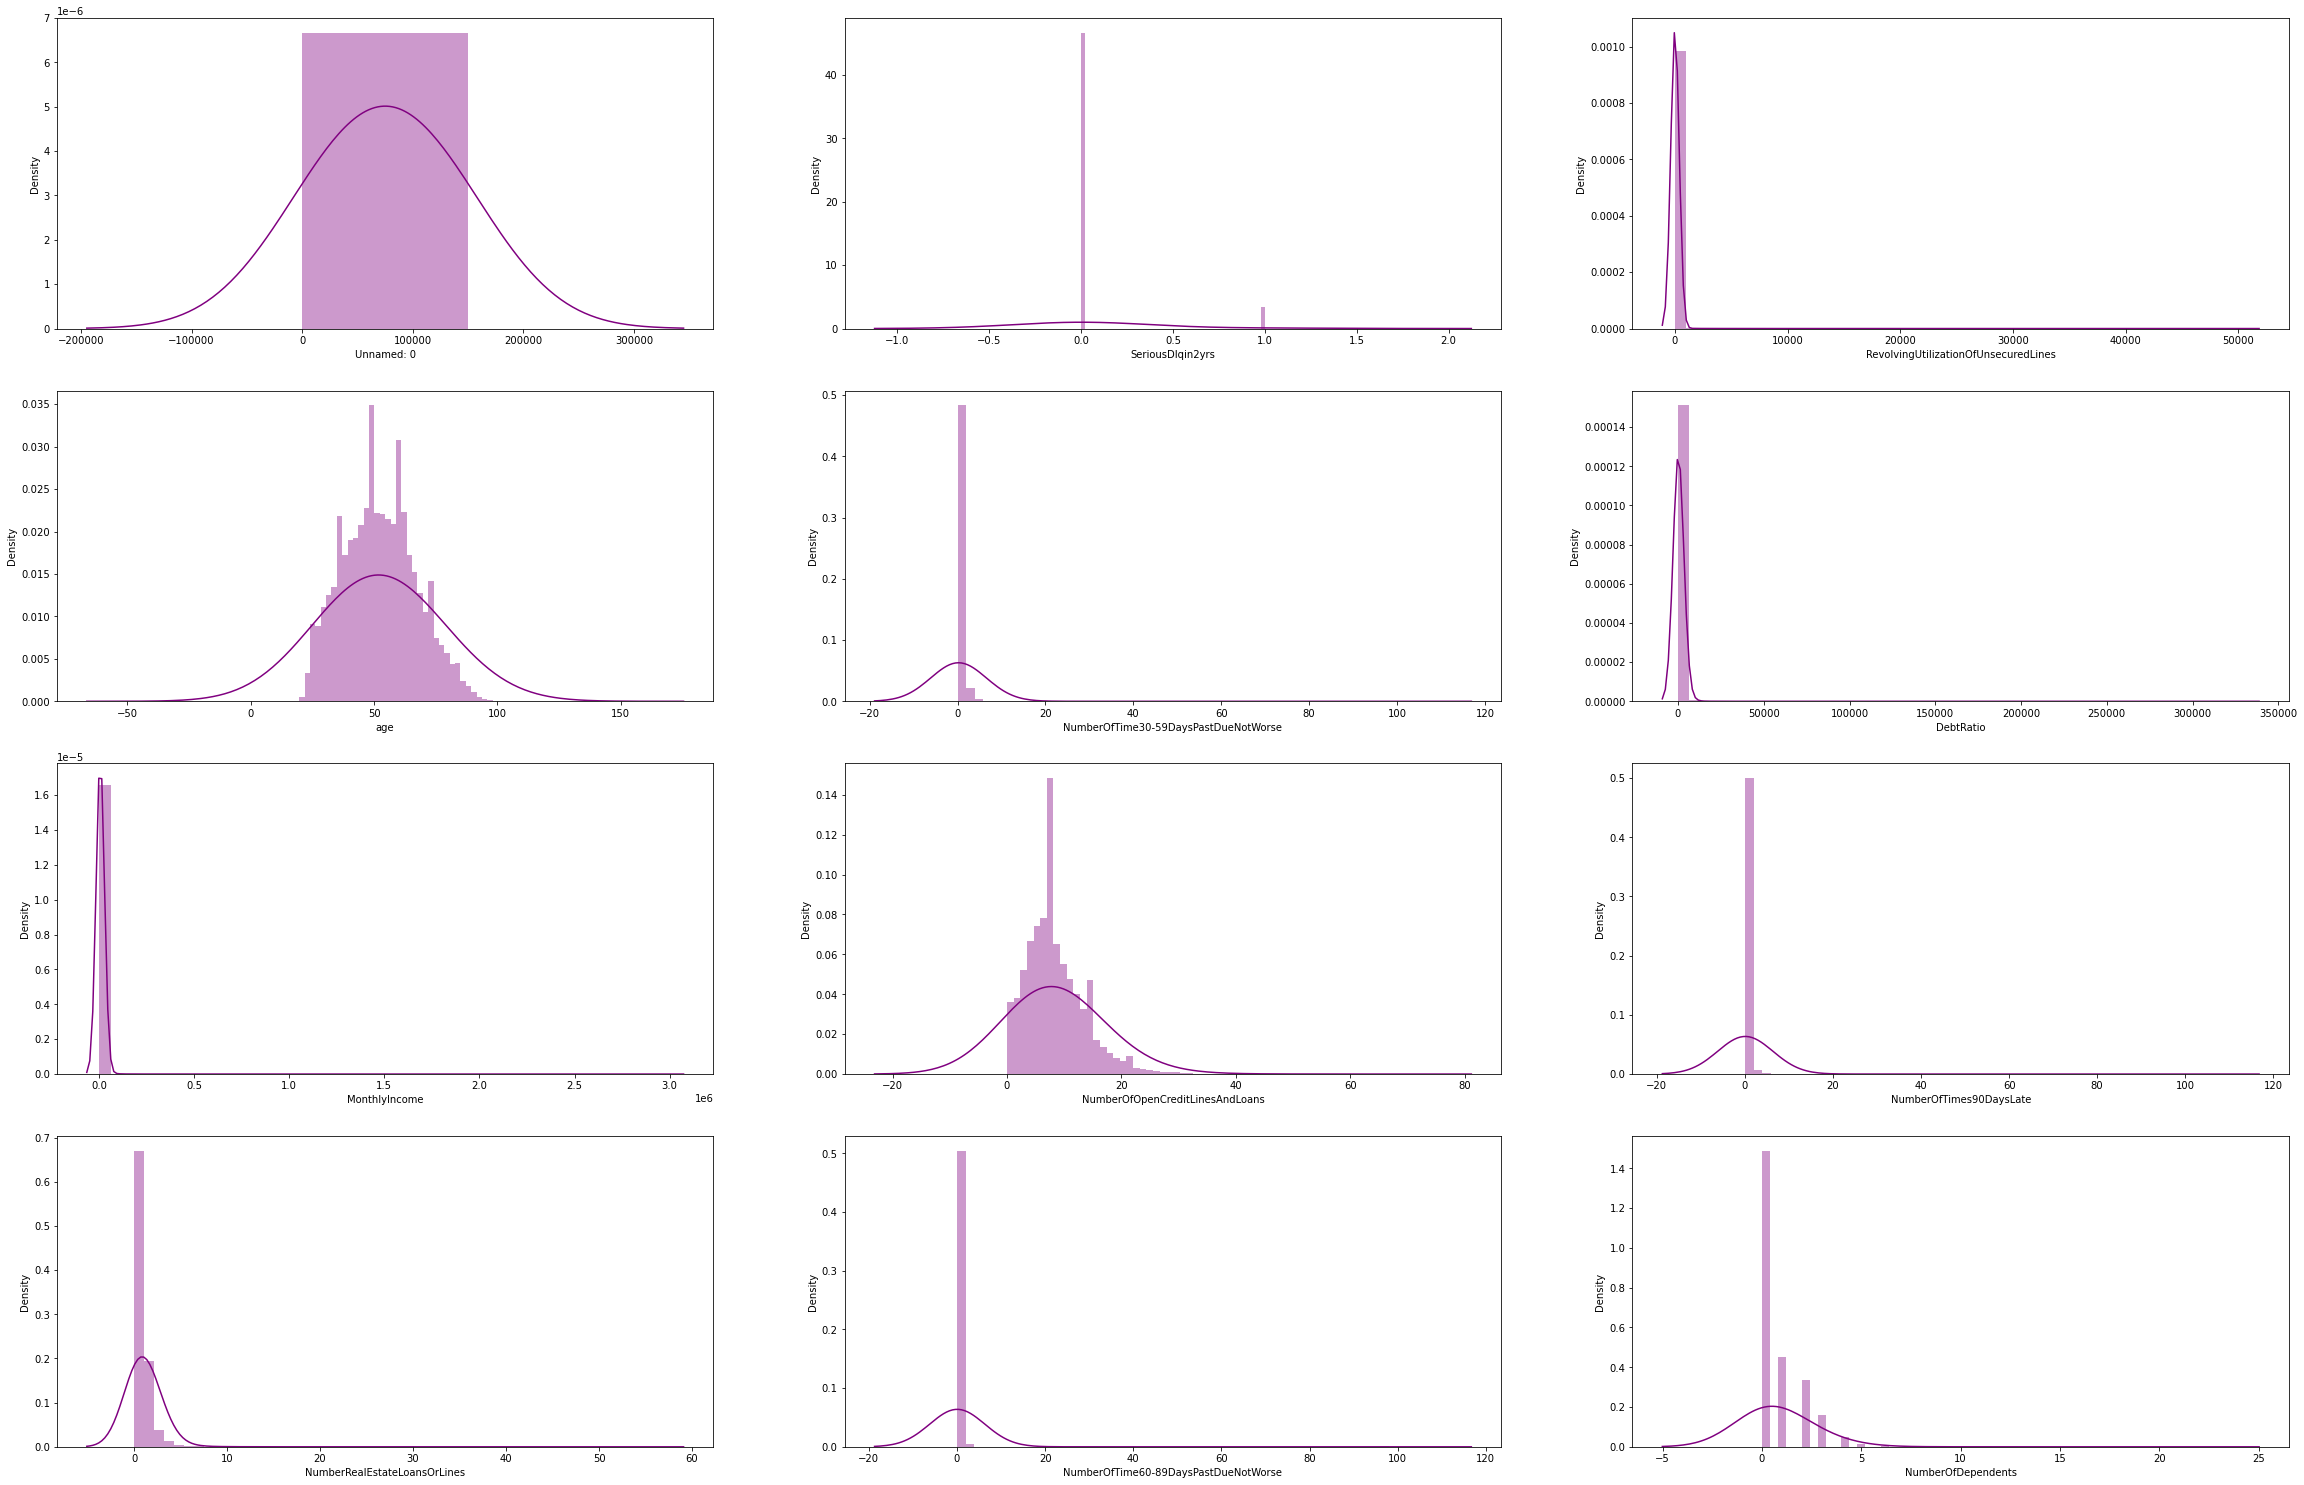

In [161]:
columnList = list(train_df.columns)
columnList

fig = plt.figure(figsize=[40,40])
for col,i in zip(columnList,range(1,19)):
    axes = fig.add_subplot(6,3,i)
    sns.distplot(train_df[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show()

- 从上面的结果来看，年龄和月收入是符合正太分布的


### 双变量分析

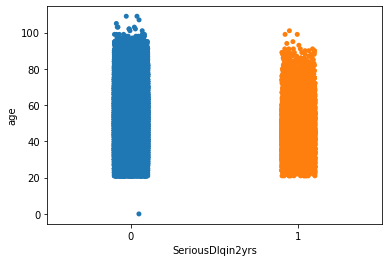

In [162]:
# 查看label的年龄分布
# 结果显示年龄分布较为一致
sns.stripplot(x='SeriousDlqin2yrs',y='age',data=train_df)
plt.show()

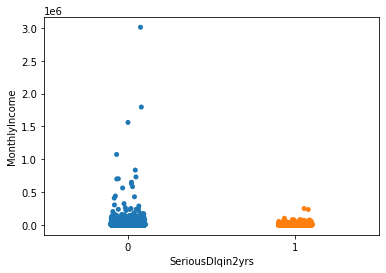

In [163]:
# 查看label的收入分布
# 结果显示：收入较高的人群，发生坏账的可能几乎不存在，这也符合显示情况
sns.stripplot(x='SeriousDlqin2yrs',y='MonthlyIncome',data=train_df)
plt.show()

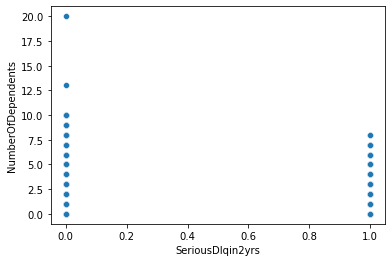

In [164]:
# 查看label的家庭成员数量分布
# 这里看不出明显区别， 家庭数量为20应该是一个异常值
sns.scatterplot(x='SeriousDlqin2yrs',y='NumberOfDependents',data=train_df)
plt.show()

<AxesSubplot:xlabel='age', ylabel='MonthlyIncome'>

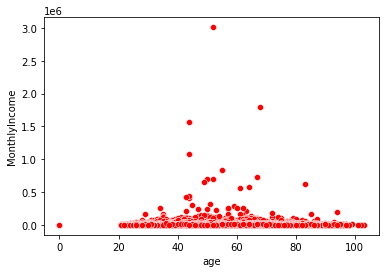

In [165]:
# 无明显的正相关或者负相关关系
sns.scatterplot(x='age',y='MonthlyIncome',data=train_df,color='r')

### 多变量相关系分析

<AxesSubplot:title={'center':'heatmap'}>

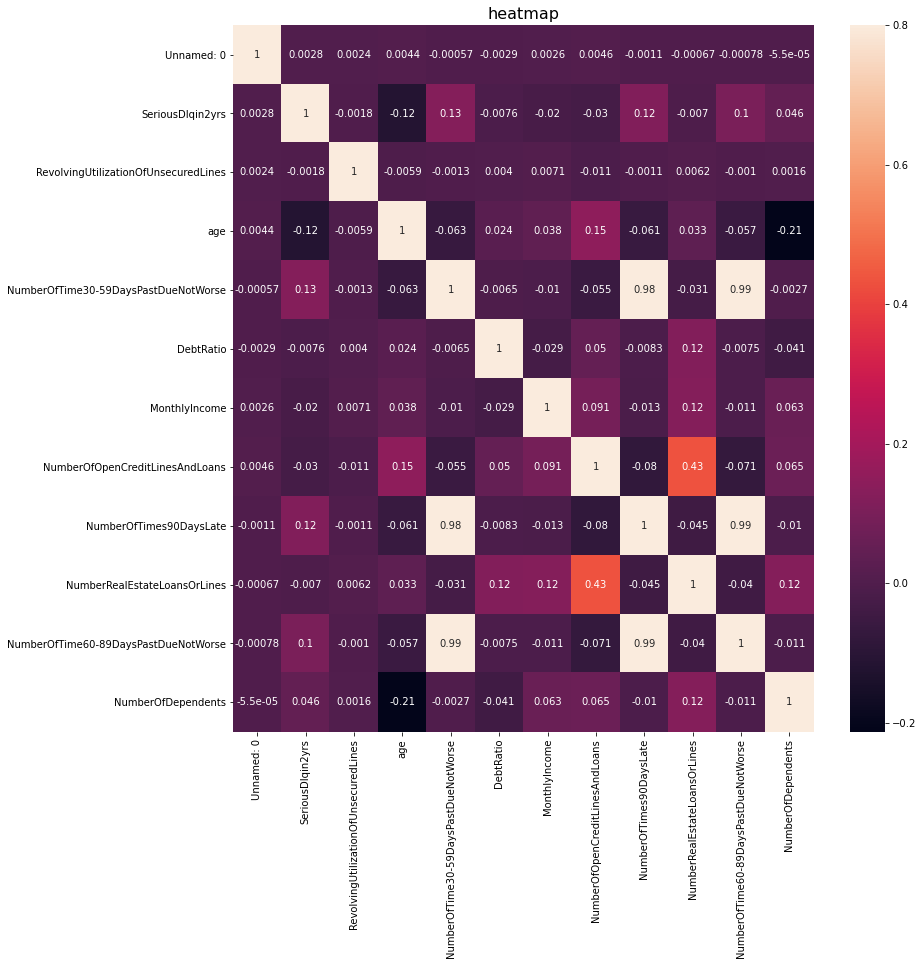

In [166]:
correlation = train_df.corr()
f , ax = plt.subplots(figsize = (13, 13))
plt.title('heatmap',y=1,size=16)
sns.heatmap(correlation,annot = True,  vmax=0.8)

## 数据处理

In [167]:
train_df.drop_duplicates(inplace=True)

train_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [168]:
# 过滤掉NumberOf-Time30-59DaysPastDueNotWorse, NumberOfTimes90Days-Late, NumberOfTime60-89DaysPastDueNotWorse大于90的记录

train_df = train_df[train_df['NumberOfTime30-59DaysPastDueNotWorse'] < 90] 
train_df = train_df[train_df['NumberOfTimes90DaysLate'] < 90] 
train_df = train_df[train_df['NumberOfTime60-89DaysPastDueNotWorse'] < 90]

In [169]:
train_df['NumberOfDependents'].value_counts()

0.0     86714
1.0     26293
2.0     19502
3.0      9479
4.0      2860
5.0       745
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [170]:
# NumberOfDependents家属大于8 的设置为8
train_df.loc[train_df['NumberOfDependents']>8,'NumberOfDependents'] = 8
test_df.loc[test_df['NumberOfDependents']>8,'NumberOfDependents'] = 8

In [171]:
# 训练集中age为0 的只有一条，可以考虑过滤掉或者均值、众数填充--- 这里直接过滤掉
train_df = train_df[train_df['age']>0]

In [172]:
# MonthlyIncome 采用平均数填充
# NumberOf-Dependents 采用中位数填充
train_df.loc[train_df['MonthlyIncome'].isna(),'MonthlyIncome'] = train_df['MonthlyIncome'].mean()
train_df.loc[train_df['NumberOfDependents'].isna(),'NumberOfDependents'] = train_df['NumberOfDependents'].median()

test_df.loc[test_df['MonthlyIncome'].isna(),'MonthlyIncome'] = test_df['MonthlyIncome'].mean()
test_df.loc[test_df['NumberOfDependents'].isna(),'NumberOfDependents'] = test_df['NumberOfDependents'].median()

In [173]:
# 划分数据集
from sklearn.model_selection import train_test_split
x = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1)
y = train_df['SeriousDlqin2yrs']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [174]:
# AUC绘图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

## 模型选择及训练

### RandomForestClassifier

AUC Score : 0.8388927918466587


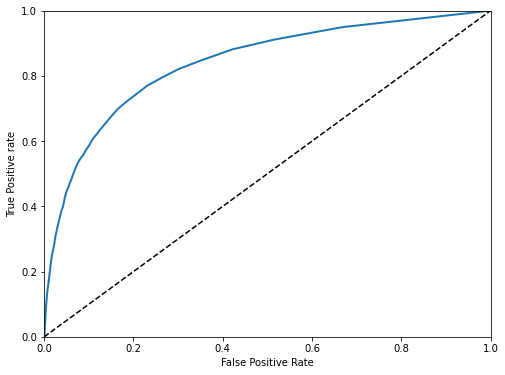

In [175]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
#随机森林
from  sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
pred=rfc.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr,tpr)
plot_roc_curve(fpr,tpr)
print('AUC Score :', roc_auc)

### GradientBoostingClassifier

AUC Score : 0.865305314996611


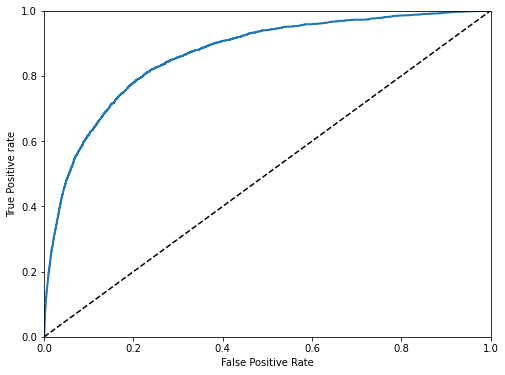

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf_submission = GradientBoostingClassifier()
gbc_clf_submission.fit(x_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, gbc_clf_proba)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

### Xgboost & RandomizedSearchCV

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [178]:
import xgboost as xgb

xgbAttribute = xgb.XGBClassifier(n_jobs=-1, gpu_id=0)

xgbParameters = {
    'max_depth' : [2,3,4,5,6,7,8],
    'learning_rate':[0.05,0.1,0.125,0.15],
    'colsample_bytree' : [0.2,0.4,0.6,0.8,1],
    'n_estimators' : [400,500,600,700,800,900],
    'gamma':[0.15,0.20,0.25,0.3,0.35],
    'subsample': [0.6,0.7,0.8,0.9,1],
    'min_child_weight': [6,7,8,9,10],
    'scale_pos_weight': [10,15,20]
    
}

xgbModel = RandomizedSearchCV(xgbAttribute, param_distributions = xgbParameters, cv = 5, random_state=2020)

xgbModel.fit(x_train,y_train)

[09:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/s

[09:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/s

[09:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/s

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=0, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_j...
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'colsample_

In [179]:
bestEstimatorXGB = xgbModel.best_estimator_
bestEstimatorXGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.25, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.125, max_delta_step=0, max_depth=5,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
bestEstimatorXGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.25, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.125, max_delta_step=0, max_depth=5,
              min_child_weight=9, monotone_constraints='()',
              n_estimators=800, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
bestEstimatorXGB.fit(x_train,y_train)

y_pre_xgb = bestEstimatorXGB.predict_proba(x_test)
y_pre_xgb = y_pre_xgb[:,1]

y_test_pre_xgb = bestEstimatorXGB.predict(x_test)
print(classification_report(y_test,y_test_pre_xgb))

[09:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     34920
           1       0.28      0.65      0.39      2513

    accuracy                           0.86     37433
   macro avg       0.63      0.76      0.66     37433
weighted avg       0.93      0.86      0.89     37433



In [182]:
confusion_matrix(y_test,y_test_pre_xgb)

array([[30720,  4200],
       [  885,  1628]], dtype=int64)

#### 输出结果

In [183]:
# 先将这两个字段删除
test_df = test_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)

In [184]:
xgb_clf_proba = bestEstimatorXGB.predict_proba(test_df)[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': xgb_clf_proba})
submission.to_csv("submision_xgb_gridSearch.csv", index=False)

In [185]:
from sklearn import metrics

In [186]:
XGBMetrics = pd.DataFrame({'Model': 'XGBoost', 
                            'MSE': round(metrics.mean_squared_error(y_test, y_test_pre_xgb)*100,2),
                            'RMSE' : round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pre_xgb)*100),2),
                            'MAE' : round(metrics.mean_absolute_error(y_test, y_test_pre_xgb)*100,2),
                            'MSLE' : round(metrics.mean_squared_log_error(y_test, y_test_pre_xgb)*100,2), 
                            'RMSLE' : round(np.sqrt(metrics.mean_squared_log_error(y_test, y_test_pre_xgb)*100),2),
                            'Accuracy Train' : round(bestEstimatorXGB.score(x_train, y_train) * 100,2),
                            'Accuracy Test' : round(bestEstimatorXGB.score(x_test, y_test) * 100,2),
                            'F-Beta Score (β=2)' : round(metrics.fbeta_score(y_test, y_test_pre_xgb, beta=2)*100,2)},index=[2])

XGBMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,Accuracy Train,Accuracy Test,F-Beta Score (β=2)
2,XGBoost,13.58,3.69,13.58,6.53,2.55,88.72,86.42,51.26


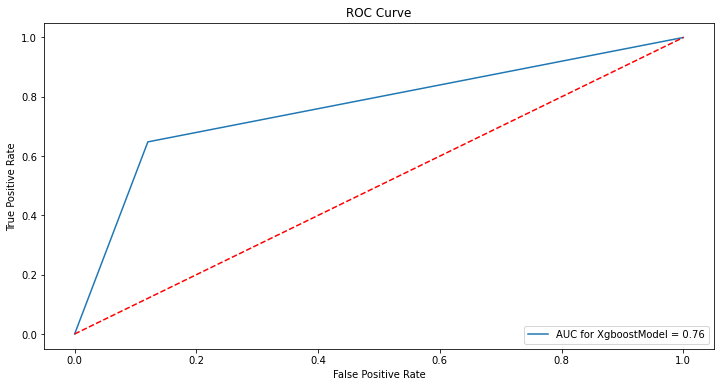

In [187]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_test_pre_xgb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(12,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for XgboostModel = %0.2f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

上述结果来看，网格搜索后的最优参数，训练得到的结果表现一般，很可能是初始参数范围选取的不合适

#### xgboost用指定参数进行训练

[09:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score : 0.865662210571466


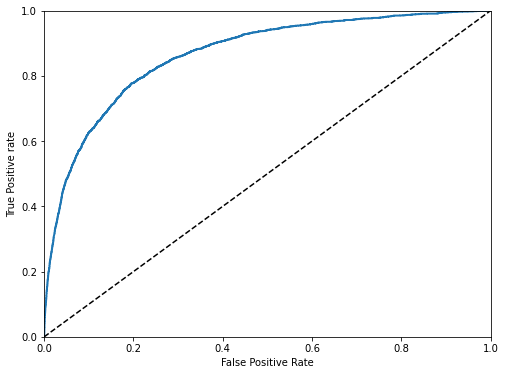

In [188]:
m = xgb.XGBClassifier(min_child_weight=5,gamma=0.3,learning_rate=0.1,colsample_bytree=0.5,max_depth=4)
m.fit(x_train,y_train)
pred = m.predict_proba(x_test)[:,1]


fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

该结果比之前的网格搜索的结果要好

In [189]:
# 输出结果
clf_proba = m.predict_proba(test_df)[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': clf_proba})
submission.to_csv("submision_xgb_randomParam.csv", index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

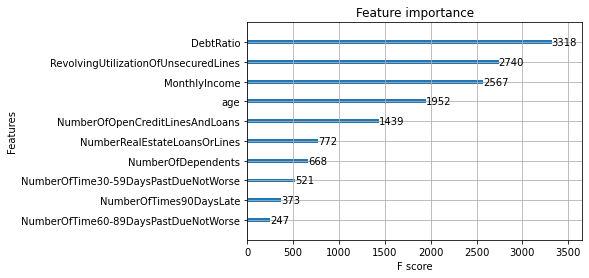

In [190]:
xgb.plot_importance(bestEstimatorXGB, importance_type='weight')

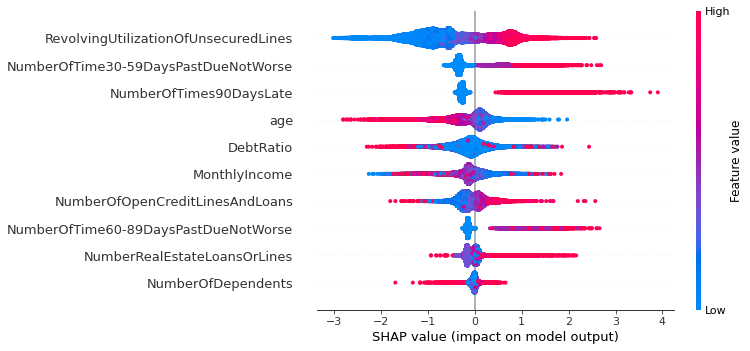

In [191]:
import shap
X = pd.DataFrame(x_train, columns=x_train.columns.to_list())

explainer = shap.TreeExplainer(bestEstimatorXGB)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

### LightGBM & RandomizedSearchCV

#### 网格搜索

In [192]:
import lightgbm as lgb 

lgbAttributes = lgb.LGBMClassifier(objective='binary', n_jobs=-1, random_state=2020, importance_type='gain')

lgbParameters = {
    'max_depth' : [2,3,4,5],
    'learning_rate': [0.05, 0.1,0.125,0.15],
    'colsample_bytree' : [0.2,0.4,0.6,0.8,1],
    'n_estimators' : [400,500,600,700,800,900],
    'min_split_gain' : [0.15,0.20,0.25,0.3,0.35], #equivalent to gamma in XGBoost
    'subsample': [0.6,0.7,0.8,0.9,1],
    'min_child_weight': [6,7,8,9,10],
    'scale_pos_weight': [10,15,20],
    'min_data_in_leaf' : [100,200,300,400,500,600,700,800,900],
    'num_leaves' : [20,30,40,50,60,70,80,90,100]
}

lgbModel = RandomizedSearchCV(lgbAttributes, param_distributions = lgbParameters, cv = 5, random_state=2020)

lgbModel.fit(x_train,y_train,feature_name=x_train.columns.to_list())

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGB

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(importance_type='gain',
                                            objective='binary',
                                            random_state=2020),
                   param_distributions={'colsample_bytree': [0.2, 0.4, 0.6, 0.8,
                                                             1],
                                        'learning_rate': [0.05, 0.1, 0.125,
                                                          0.15],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_child_weight': [6, 7, 8, 9, 10],
                                        'min_data_in_leaf': [100, 200, 300, 400,
                                                             500, 600, 700, 800,
                                                             900],
                                        'min_split_gain': [0.15, 0.2, 0.25, 0.3,
                                     

In [193]:
bestEstimatorLGB = lgbModel.best_estimator_
bestEstimatorLGB

LGBMClassifier(colsample_bytree=0.2, importance_type='gain',
               learning_rate=0.125, max_depth=4, min_child_weight=9,
               min_data_in_leaf=500, min_split_gain=0.15, n_estimators=500,
               num_leaves=80, objective='binary', random_state=2020,
               scale_pos_weight=10, subsample=0.9)

In [194]:
bestEstimatorLGB = lgb.LGBMClassifier(colsample_bytree=0.2, importance_type='gain',
               learning_rate=0.125, max_depth=4, min_child_weight=9,
               min_data_in_leaf=500, min_split_gain=0.15, n_estimators=500,
               num_leaves=80, objective='binary', random_state=2020,
               scale_pos_weight=10, subsample=0.9)

bestEstimatorLGB.fit(x_train,y_train)

y_pre_lgb = bestEstimatorLGB.predict_proba(x_test)
y_pre_lgb = y_pre_lgb[:,1]

y_test_pre_lgb = bestEstimatorLGB.predict(x_test)
print(classification_report(y_test,y_test_pre_lgb))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     34920
           1       0.27      0.67      0.38      2513

    accuracy                           0.85     37433
   macro avg       0.62      0.77      0.65     37433
weighted avg       0.93      0.85      0.88     37433



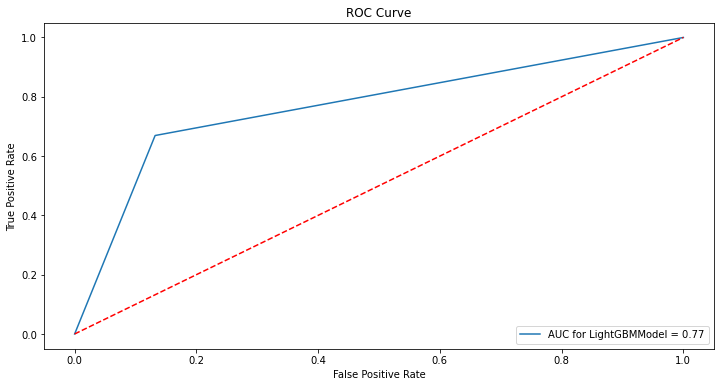

In [195]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_test_pre_lgb)
rocAuc = metrics.auc(fpr, tpr)
plt.figure(figsize=(12,6))
plt.title('ROC Curve')
sns.lineplot(fpr, tpr, label = 'AUC for LightGBMModel = %0.2f' % rocAuc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [196]:
lgb_clf_proba = bestEstimatorLGB.predict_proba(test_df)[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': lgb_clf_proba})
submission.to_csv("submision_lgb_gridSearch.csv", index=False)

In [197]:
len(lgb_clf_proba)

101503

#### 特征重要性查看

从上面结果来看，网格参数的结果并不是很好

#### 随机参数初始化

[LightGBM] [Warning] Unknown parameter: gamma
AUC Score : 0.8659690856116351


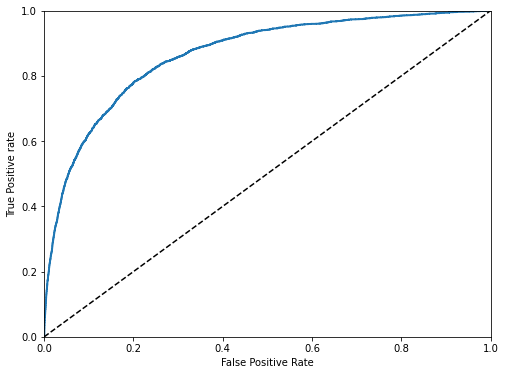

In [198]:
m = lgb.LGBMClassifier(min_child_weight=5,gamma=0.3,learning_rate=0.1,colsample_bytree=0.5,max_depth=4)
m.fit(x_train,y_train)
pred = m.predict_proba(x_test)[:,1]


fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr,tpr)
print ('AUC Score :', roc_auc)
plot_roc_curve(fpr,tpr)

In [199]:
# 输出结果
clf_proba = m.predict_proba(test_df)[:,1]
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': clf_proba})
submission.to_csv("submision_lgb_randomParam.csv", index=False)

In [200]:
len(clf_proba)

101503

#### 特征重要性查看

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

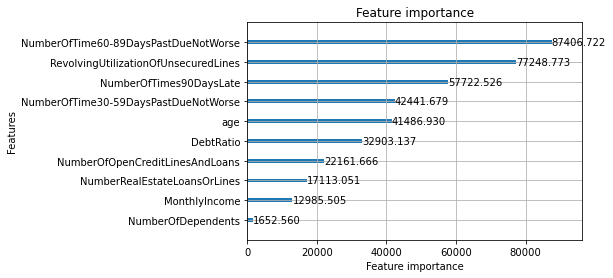

In [201]:
lgb.plot_importance(bestEstimatorLGB, importance_type='gain')

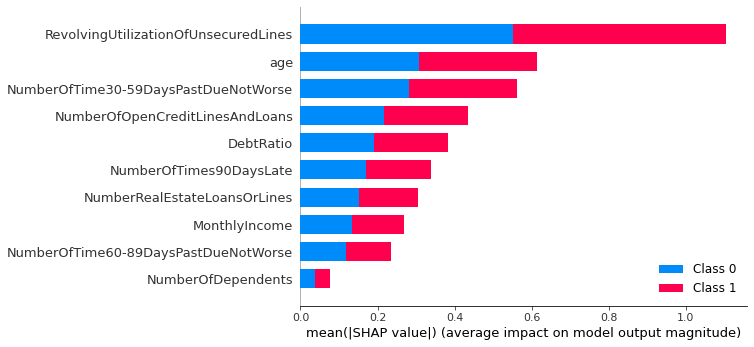

In [202]:
# 利用Shap_value查看
import shap
X = pd.DataFrame(x_train, columns=x_train.columns.to_list())

explainer = shap.TreeExplainer(bestEstimatorLGB)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

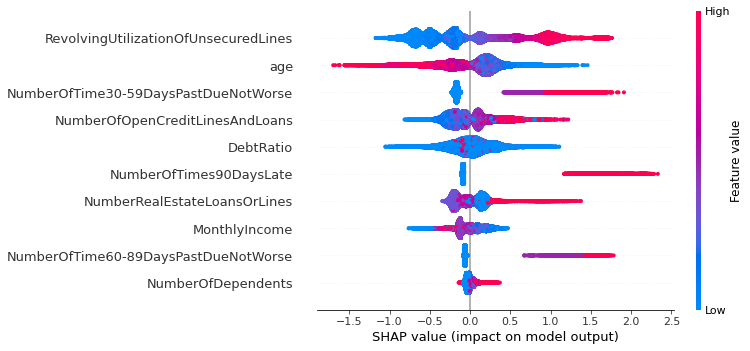

In [203]:
shap.summary_plot(shap_values[1], X)